Author: **Andrei Ermishin**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('Задача.xlsx')
# data.to_json('table.json', orient='records')
# data = pd.read_json('table.json')
print(data.shape)
data.head()

(484, 5)


,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,6-LLJEH,20,1,263,716693
1,2-GLHFG,74,51,107,274393
2,6-FJFKL,27,1,165,723841
3,4-KJEJL,24,6,348,139419
4,5-JFFGH,26,3,286,650003


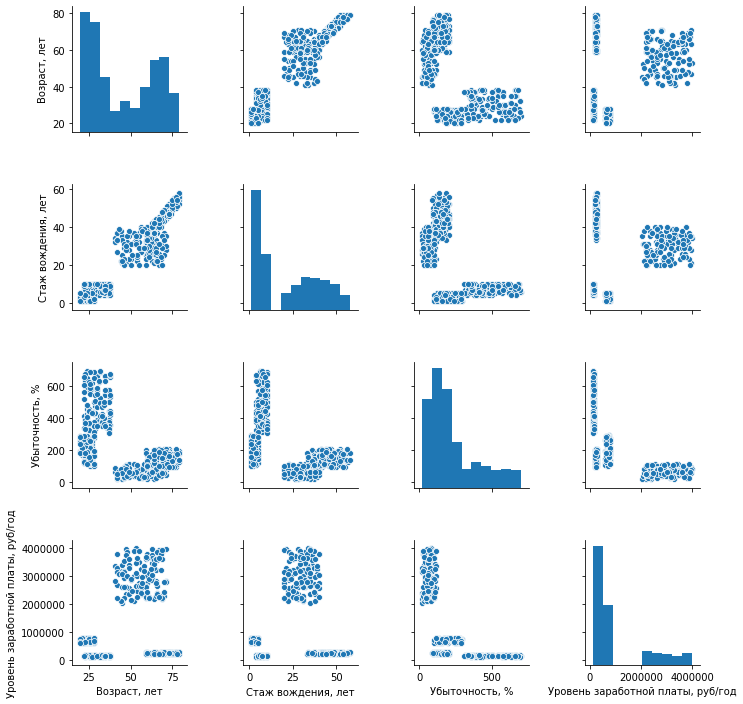

In [3]:
sns.pairplot(data)

In [4]:
X = data.drop('Персона', axis='columns')
# X = data.drop(data.columns[0], axis='columns')
X.head(2)

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год"
0,20,1,263,716693
1,74,51,107,274393


## K-Means

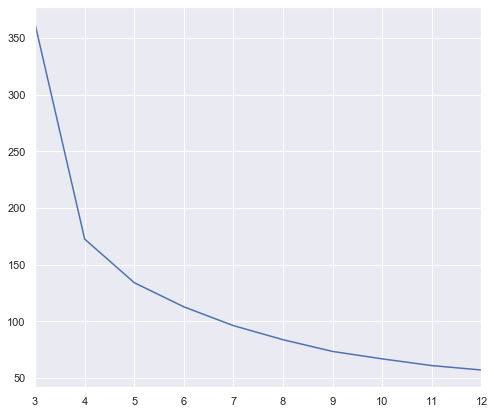

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

min_c, max_c = 3, 13
inertia_lst = []
for num_clusters in range(min_c, max_c):
    kmeans = KMeans(n_clusters=num_clusters, n_jobs=-1, random_state=11)
    kmeans.fit(X_scaled)
    inertia_lst.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(8, 7)})
pd.Series(data=inertia_lst, index=list(range(min_c, max_c))).plot()

In [6]:
new_num_clusters = 5
kmeans_new = KMeans(n_clusters=new_num_clusters, n_jobs=-1, random_state=11)
kmeans_new.fit(X_scaled)

data[f'{new_num_clusters}кластеров'] = kmeans_new.labels_
data.head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",5кластеров
0,6-LLJEH,20,1,263,716693,0
1,2-GLHFG,74,51,107,274393,1
2,6-FJFKL,27,1,165,723841,0
3,4-KJEJL,24,6,348,139419,3
4,5-JFFGH,26,3,286,650003,0


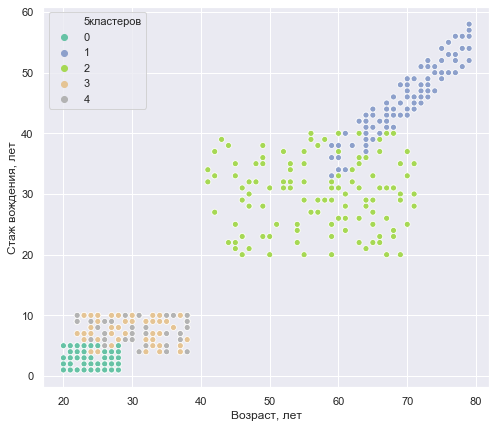

In [7]:
sns.scatterplot(x='Возраст, лет', y='Стаж вождения, лет',
                hue='5кластеров', palette='Set2', data=data, legend='full')

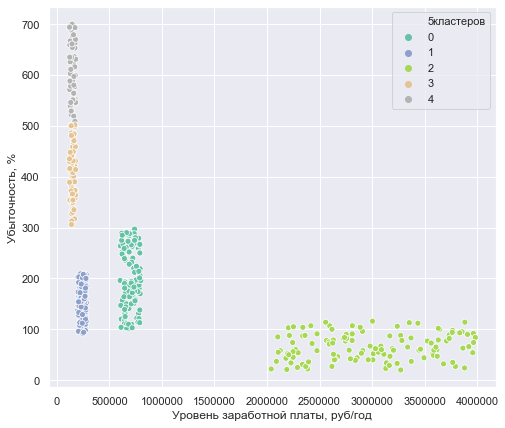

In [8]:
sns.scatterplot(x='Уровень заработной платы, руб/год', y='Убыточность, %',
                hue='5кластеров', palette='Set2', data=data, legend='full')

## Hierarchical clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 5
agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
agglo.fit(X_scaled)

pred = pd.Series(data=agglo.labels_, index=data.index, name=f'Иерархически{num_clusters}')

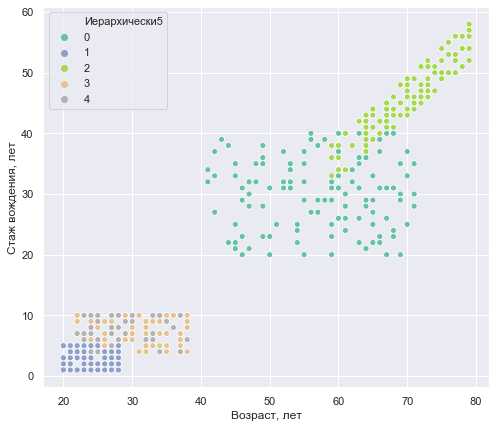

In [10]:
sns.scatterplot(x='Возраст, лет', y='Стаж вождения, лет',
                hue=pred, palette='Set2', data=data, legend='full')

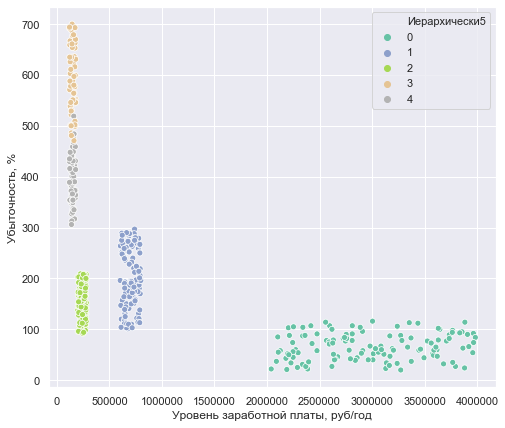

In [11]:
sns.scatterplot(x='Уровень заработной платы, руб/год', y='Убыточность, %',
                hue=pred, palette='Set2', data=data, legend='full')

In [12]:
# Result of Flask app:
pd.read_json('result.json').head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",5кластеров
0,6-LLJEH,20,1,263,716693,1
1,2-GLHFG,74,51,107,274393,2
2,6-FJFKL,27,1,165,723841,1
3,4-KJEJL,24,6,348,139419,4
4,5-JFFGH,26,3,286,650003,1
